In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
# import dataset
dataset = pd.ExcelFile('Credit_records.xlsx')
input_frame = pd.read_excel(dataset, 'Details')

In [3]:
input_frame.head()

,LoanID,Client_FirstNames,Client_Surname,Employer_Name,Division_ShortName,LoanCreationTimestamp,LoanTerm,LoanMonthlyBasePayment,TotalCollectable,IssuedCash (Sales),Admin_FeeInterest,SettlementDate,DaysInArrears,Recency,StatusReason,LoanStatus,RecognisedDebtorBalance,Month,New Fee,Unnamed: 19
0,'3900000074386,ADOLF,KAHUMA KUSEMERERWA,NTOROKO DISTRICT,LOCAL,2014-11-10 10:38:49,60,524900.36,31494021.60,656000.0,737585.36,Not Set,360.0,NonPerforming,,Active,22826703.86,2014-11-01,NaN,NaN
1,'3900000084908,LAWRENCE,TWEYANZE,THE JUDICIARY,THE JUDICIARY,2015-11-04 14:54:03,36,1087504.66,39150167.76,14995000.0,1036280.14,Not Set,300.0,Performing Active (1-2),A005,Active,20776627.31,2015-11-01,NaN,NaN
2,'5900000008677,GLORIA,LAMARO,GULU UNIVERSITY,GULU_UNIVERSITY,2017-10-26 09:19:24,60,719993.44,43199606.40,15740000.0,349997.69,Not Set,30.0,Performing Active (1-2),,Active,18766859.56,2017-10-01,NaN,NaN
3,'3900000083165,HARRIET SSALI,NALUKWAGO,THE JUDICIARY,THE JUDICIARY,2015-09-01 10:48:52,48,788343.63,37840494.24,14995000.0,854403.10,Not Set,210.0,Performing Active (1-2),A005,Active,17456398.00,2015-09-01,NaN,NaN
4,'3900000076903,JAMES MOSES,KISITA,MAYUGE DISTRICT,LOCAL,2015-02-06 09:36:53,60,416089.82,24965389.20,9880000.0,554205.53,Not Set,360.0,Performing Active (1-2),,Active,16351644.12,2015-02-01,NaN,NaN


In [4]:
# check whether there are missing values
input_frame.info

<bound method DataFrame.info of                LoanID Client_FirstNames      Client_Surname  \
0      '3900000074386             ADOLF  KAHUMA KUSEMERERWA   
1      '3900000084908          LAWRENCE            TWEYANZE   
2      '5900000008677            GLORIA              LAMARO   
3      '3900000083165     HARRIET SSALI           NALUKWAGO   
4      '3900000076903       JAMES MOSES              KISITA   
5      '3900000055056     COSMAS ALFRED              BUTELE   
6      '3900000083443            JOSEPH              ANGOLE   
7      '3900000091148              LOIS      NANKYA MUTIBWA   
8      '3900000069073          ERIC H E            DRANIMVA   
9      '3900000084282            FARIDA            NAMUTEBI   
10     '3900000012366           RICHARD          BISHERURWA   
11     '3900000069744              JOHN      MUGGAGA KAVUMA   
12     '3900000055904              LILY     ADONYO    ODONG   
13     '3900000036473              MUSA             LUBANGA   
14     '3900000076165  

In [5]:
#Drop last column called unnamed
input_frame.columns.values

array(['LoanID', 'Client_FirstNames', 'Client_Surname', 'Employer_Name',
       'Division_ShortName', 'LoanCreationTimestamp', 'LoanTerm',
       'LoanMonthlyBasePayment', 'TotalCollectable', 'IssuedCash (Sales)',
       'Admin_FeeInterest', 'SettlementDate', 'DaysInArrears', 'Recency',
       'StatusReason', 'LoanStatus', 'RecognisedDebtorBalance', 'Month',
       'New Fee', 'Unnamed: 19'], dtype=object)

In [6]:
input_frame.drop(['Unnamed: 19'], axis=1, inplace=True)
input_frame.columns.values

array(['LoanID', 'Client_FirstNames', 'Client_Surname', 'Employer_Name',
       'Division_ShortName', 'LoanCreationTimestamp', 'LoanTerm',
       'LoanMonthlyBasePayment', 'TotalCollectable', 'IssuedCash (Sales)',
       'Admin_FeeInterest', 'SettlementDate', 'DaysInArrears', 'Recency',
       'StatusReason', 'LoanStatus', 'RecognisedDebtorBalance', 'Month',
       'New Fee'], dtype=object)

In [7]:
#Explore the summarised stats of the data set
input_frame.describe()

,LoanTerm,LoanMonthlyBasePayment,TotalCollectable,IssuedCash (Sales),Admin_FeeInterest,DaysInArrears,RecognisedDebtorBalance,New Fee
count,35065.000000,3.506500e+04,3.506500e+04,3.506500e+04,3.506500e+04,35064.000000,3.506500e+04,0.0
mean,56.166348,1.278477e+05,7.156970e+06,1.602533e+06,1.388830e+05,154.724504,2.697400e+06,NaN
std,11.746448,5.228131e+04,3.337813e+06,1.252223e+06,8.522187e+04,145.527602,1.713417e+06,NaN
min,3.000000,4.251400e+03,2.550840e+05,1.000000e+05,0.000000e+00,0.000000,2.700000e-01,NaN
25%,60.000000,9.685611e+04,4.690184e+06,6.000000e+05,6.935696e+04,0.000000,1.361964e+06,NaN
50%,60.000000,1.374338e+05,7.660551e+06,1.127000e+06,1.345628e+05,120.000000,2.683342e+06,NaN
75%,60.000000,1.599965e+05,9.412849e+06,2.495000e+06,2.017464e+05,330.000000,3.780682e+06,NaN
max,72.000000,1.087505e+06,4.319961e+07,1.574000e+07,1.036280e+06,360.000000,2.282670e+07,NaN


In [8]:
#Start to do some data analysis
#How many clients are in ntungamop district

In [9]:
input_frame['name'] = input_frame['Client_FirstNames'].str.lower() + ' ' + input_frame['Client_Surname'].str.lower() 
working_frame = input_frame[['name', 'Employer_Name']]
working_frame = working_frame.groupby(['Employer_Name'])['name'].nunique().reset_index().rename(columns={'name':'distinct_clients'})
ntungamo = working_frame.loc[working_frame['Employer_Name'].str.lower() == 'ntungamo district']
ntungamo

,Employer_Name,distinct_clients
174,NTUNGAMO DISTRICT,774


In [10]:
#How many clients have a loan term of 36 and above

In [11]:
input_frame['name'] = input_frame['Client_FirstNames'].str.lower() + ' ' + input_frame['Client_Surname'].str.lower() 
working_frame = input_frame[['name', 'LoanTerm']]
working_frame = input_frame.loc[input_frame['LoanTerm'] >= 36]
outputframe = working_frame.groupby(['name'])['LoanTerm'].count()
print(len(outputframe))

30191


In [12]:
#Which month did we get the highest issued cash

In [13]:
working_frame = input_frame[['LoanCreationTimestamp', 'IssuedCash (Sales)']]
max_issued_cash = max(input_frame['IssuedCash (Sales)'])
for i,j in zip(input_frame['LoanCreationTimestamp'], input_frame['IssuedCash (Sales)']):
    if(j == max_issued_cash):
        print(i.strftime('%b'))

Oct


In [14]:
# Using Graphical Tools of your choice, identify which Recency (Column N) has the highest Recognised Debtor Bal (Column Q)

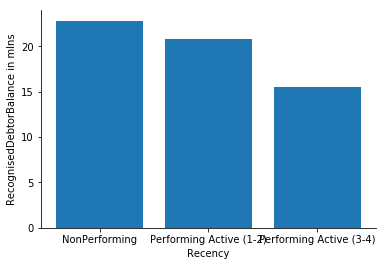

In [15]:
working_frame = input_frame.groupby(['Recency'])['RecognisedDebtorBalance'].max().reset_index()
working_frame['RecognisedDebtorBalance'] = working_frame['RecognisedDebtorBalance']/1000000
fig, ax = plt.subplots()
ax.bar(working_frame['Recency'], working_frame['RecognisedDebtorBalance'])
ax.set_xlabel('Recency')
ax.set_ylabel('RecognisedDebtorBalance in mlns')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [16]:
''' In Column S labeled New Fee, using a formulae of your choice, attach a fee of 50,000 to all 
clients with A LOAN TERM higher or equal to 36'''

' In Column S labeled New Fee, using a formulae of your choice, attach a fee of 50,000 to all \nclients with A LOAN TERM higher or equal to 36'

In [17]:
x = []
for i,j in zip(input_frame['LoanTerm'], input_frame['New Fee']):
    if(i >= 36):
        x.append(50000)
    else:
        x.append('')
input_frame['New Fee'] = x
input_frame['New Fee']

0        50000
1        50000
2        50000
3        50000
4        50000
5        50000
6        50000
7        50000
8        50000
9        50000
10       50000
11       50000
12       50000
13       50000
14       50000
15       50000
16       50000
17       50000
18       50000
19       50000
20       50000
21       50000
22       50000
23       50000
24       50000
25       50000
26       50000
27       50000
28       50000
29       50000
         ...  
35035         
35036    50000
35037         
35038    50000
35039    50000
35040    50000
35041         
35042    50000
35043    50000
35044         
35045    50000
35046    50000
35047    50000
35048    50000
35049    50000
35050         
35051         
35052    50000
35053         
35054    50000
35055    50000
35056         
35057    50000
35058    50000
35059    50000
35060    50000
35061    50000
35062    50000
35063    50000
35064         
Name: New Fee, Length: 35065, dtype: object

In [18]:
#Using a Reference formulae of your choice attach the correlating information for these loan ID's from the Details Sheet

In [19]:
spec_pop = pd.read_excel(dataset, 'Q6-Special Population')
spec_pop.columns = spec_pop.iloc[0]
spec_pop.drop(spec_pop.index[0], inplace=True)
spec_pop.rename(columns={'Loan ID':'LoanID'}, inplace=True)
detail_spec_pop = spec_pop.merge(input_frame, on='LoanID', how='left')
detail_spec_pop.drop(detail_spec_pop.columns[14:], axis=1, inplace=True)
detail_spec_pop.head()

,LoanID,Client_FirstNames_x,Client_Surname_x,Employer_Name_x,TotalCollectable_x,IssuedCash,Admin_FeeInterest_x,SettlementDate_x,DaysInArrears_x,Recency_x,Client_FirstNames_y,Client_Surname_y,Employer_Name_y,Division_ShortName
0,'3900000059275,ELIZABETH,BALUKA,KIBUKU DISTRICT,6.97061e+06,527000,181836,Not Set,360,Performing Active (1-2),ELIZABETH,BALUKA,KIBUKU DISTRICT,EDUCATION
1,'3900000052856,ZADOCH,MWIJUKA,MBARARA DISTRICT,5051166,2000000,134762,Not Set,360,NonPerforming,ZADOCH,MWIJUKA,MBARARA DISTRICT,EDUCATION
2,'3900000091091,RAY OMONA,OWIRO,LAMWO DISTRICT,6.92556e+06,939000,88694.2,Not Set,0,Performing Active (1-2),RAY OMONA,OWIRO,LAMWO DISTRICT,EDUCATION
3,'5900000004106,ROBERT,OJOK,UGANDA POLICE,6.34966e+06,311000,115835,Not Set,0,Performing Active (1-2),ROBERT,OJOK,UGANDA POLICE,UGANDA_POLICE
4,'3900000058299,LIVINGSTONE,OKONYA,UGANDA POLICE,6.5943e+06,2611000,172681,Not Set,330,Performing Active (1-2),LIVINGSTONE,OKONYA,UGANDA POLICE,POLICE PRISONS


In [20]:
#Total collectible cash for the special population
import math
math.ceil(detail_spec_pop['TotalCollectable_x'].sum())

1283265224

In [21]:
#Missing data explored further
missing_values = input_frame.isnull().sum().sort_values(ascending=False)
missing_values

Recency                    1
DaysInArrears              1
name                       0
TotalCollectable           0
Client_FirstNames          0
Client_Surname             0
Employer_Name              0
Division_ShortName         0
LoanCreationTimestamp      0
LoanTerm                   0
LoanMonthlyBasePayment     0
IssuedCash (Sales)         0
New Fee                    0
Admin_FeeInterest          0
SettlementDate             0
StatusReason               0
LoanStatus                 0
RecognisedDebtorBalance    0
Month                      0
LoanID                     0
dtype: int64

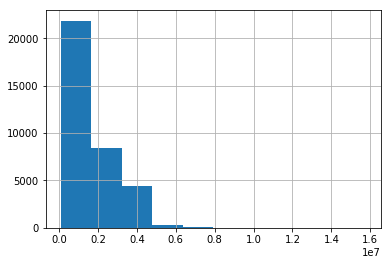

In [22]:
input_frame['IssuedCash (Sales)'].hist()
plt.show()

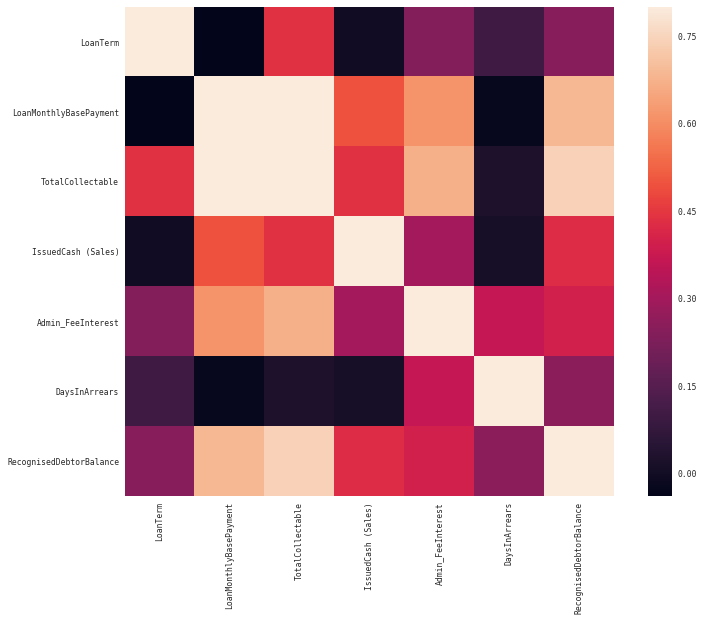

In [23]:
#Checking out correlation within the dataset
sns.set(context='paper', font='monospace')
corrl = input_frame.corr()
fig,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrl, vmax=0.8, square=True)
plt.show()